In [34]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
from morphon import Morpho, plot

In [36]:
m = Morpho('zjumps.swc')
#m = Morpho('BE79B-3ak.swc')
#m = Morpho('WT-P270-20-14ak.swc')

In [37]:
def locate_jumps(m, max_increment=5, max_rel_increment=3):
    jumps = [i for i in m.points() 
             if abs(m.increment(i)) > max_increment \
                 and abs(m.rel_increment(i)) > max_rel_increment]
    return jumps

In [38]:
#jumps = locate_jumps(m)
jumps = m.jumps(increment_thresh=10)
len(jumps)

12

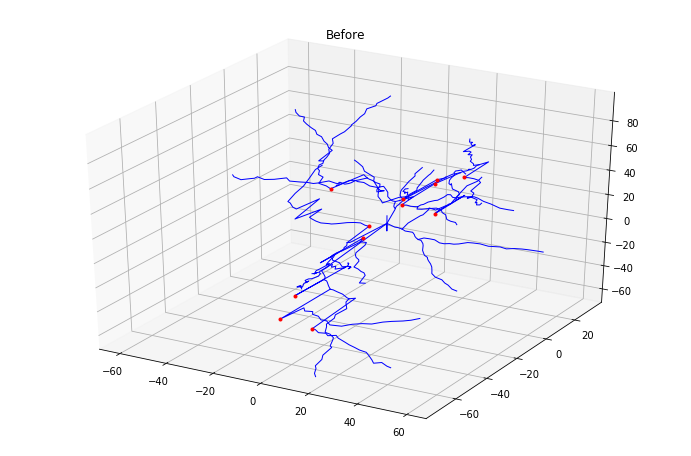

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
plot(m, ax, projection='3d')
plot(m, ax, projection='3d', idents=jumps, linestyle=' ', marker='.', color='r')
plt.title('Before');

In [40]:
def correct_jumps(m, jumps):
    for ident in jumps:
        parent = m.parent(ident)
        c1 = m.coord(ident)
        c0 = m.coord(parent)
        shift = c0[2]-c1[2]
        m.translate((0, 0, shift), ident=ident)

In [41]:
n = m.copy()
iter = 0
while jumps:
    correct_jumps(n, jumps)
    jumps = locate_jumps(n)
    iter += 1
restore = m.size() / n.size()
n.scale(restore)
print iter, 'iterations'

5 iterations


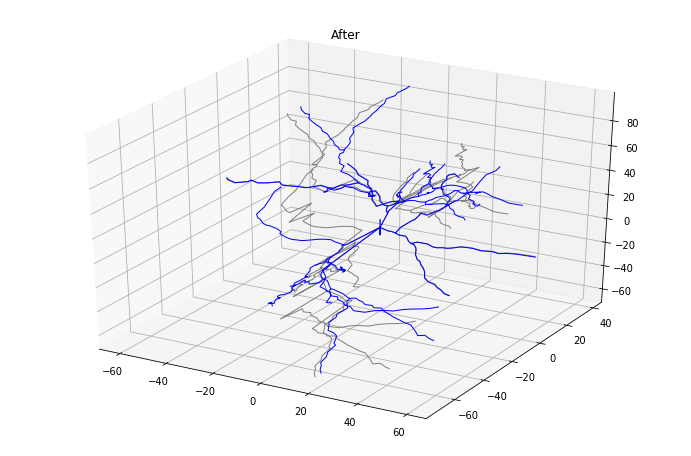

In [42]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
plot(m, ax, projection='3d', color='grey')
plot(n, ax, projection='3d')
plt.title('After');